In [1]:
import numpy as np
import pandas as pd
import pandas_profiling
from tqdm import tqdm
import tensorflow as tf
import time 
import warnings
warnings.filterwarnings("ignore")
import os
import sys
import seaborn as sns
import matplotlib.pyplot as plt
import math

# EDA

## BASIC

In [2]:
filepath = "/content/drive/Shareddrives/TNT/정규세션/2021년 2학기/산업인공지능/TASK2-wafer map /LSWMD.pkl"

In [3]:
df=pd.read_pickle(filepath)

In [4]:
df.head()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,1.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,2.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,3.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,4.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,lot1,5.0,[[Training]],[[none]]


In [5]:
df.tail()

,waferMap,dieSize,lotName,waferIndex,trianTestLabel,failureType
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,23.0,[[Test]],[[Edge-Ring]]
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,lot47542,24.0,[[Test]],[[Edge-Loc]]
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47542,25.0,[[Test]],[[Edge-Ring]]
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,lot47543,1.0,[],[]
811456,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,lot47543,2.0,[],[]


In [6]:
df.info() # Non-null dataset - > FALSE

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 811457 entries, 0 to 811456
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   waferMap        811457 non-null  object 
 1   dieSize         811457 non-null  float64
 2   lotName         811457 non-null  object 
 3   waferIndex      811457 non-null  float64
 4   trianTestLabel  811457 non-null  object 
 5   failureType     811457 non-null  object 
dtypes: float64(2), object(4)
memory usage: 37.1+ MB


In [7]:
df.describe() # Wafer Index := The order of the wafer at arbitrary lot

,dieSize,waferIndex
count,811457.000000,811457.000000
mean,1840.998585,12.961207
std,2254.987374,7.207489
min,3.000000,1.000000
25%,710.000000,7.000000
50%,953.000000,13.000000
75%,1902.000000,19.000000
max,48099.000000,25.000000


## lot name & Wafer Index

In [8]:
## Domain Knowledge : 25 wafers == 1 lot
df["lotName"].value_counts() # For Each LotName, Wafer Index Ranges From 1 to 25

lot14787    25
lot15625    25
lot42785    25
lot16971    25
lot43103    25
            ..
lot40217     1
lot26957     1
lot8743      1
lot19422     1
lot27507     1
Name: lotName, Length: 46293, dtype: int64

In [9]:
df["waferIndex"].value_counts() 
# 'waferIndex' and 'lotName' is as same as index of the data == meaningless 

6.0     32745
4.0     32714
5.0     32701
7.0     32672
2.0     32663
8.0     32650
11.0    32637
9.0     32636
3.0     32621
12.0    32598
10.0    32586
1.0     32516
13.0    32381
16.0    32362
14.0    32353
18.0    32333
17.0    32333
21.0    32320
22.0    32312
15.0    32301
20.0    32290
19.0    32285
23.0    32202
24.0    32197
25.0    32049
Name: waferIndex, dtype: int64

In [10]:
data = df.iloc[:,[0,1,4,5]]
data

,waferMap,dieSize,trianTestLabel,failureType
0,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,[[Training]],[[none]]
1,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,[[Training]],[[none]]
2,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,[[Training]],[[none]]
3,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,[[Training]],[[none]]
4,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,...",1683.0,[[Training]],[[none]]
...,...,...,...,...
811452,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,[[Test]],[[Edge-Ring]]
811453,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 1, 1,...",600.0,[[Test]],[[Edge-Loc]]
811454,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1,...",600.0,[[Test]],[[Edge-Ring]]
811455,"[[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,...",600.0,[],[]


## Train Test Label

In [11]:
print(data["trianTestLabel"][0])
print(data["trianTestLabel"][0][0])
print(data["trianTestLabel"][0][0][0]) ## array nested structure

[['Training']]
['Training']
Training


In [12]:
print("The Number of Training Data : ",(data["trianTestLabel"] == "Training").sum()) 
print("The Number of Test Data : ",(data["trianTestLabel"] == "Test").sum())
print("The Number of NONE Data : ",data.shape[0]-(data["trianTestLabel"] == "Test").sum() - (data["trianTestLabel"] == "Training").sum()) 

The Number of Training Data :  54355
The Number of Test Data :  118595
The Number of NONE Data :  638507


## Failure Type

In [13]:
data["failureType"].unique() # error occured by array nested structure

TypeError: ignored

### from the data description

811,457 wafer maps collected from 46,393 lots in real-world fabrication

Here lists all defects type in this dataset:

Center, Donut, Edge-Loc, Edge-Ring, Loc, Random, Scratch, Near-full, none.

In [14]:
failtype = ['Center', 'Donut', 'Edge-Loc', 'Edge-Ring', 'Loc', 'Random', 'Scratch', 'Near-full']
labeltype = ['Training', 'Test']
data['FAILTYPE'] = '0'
data['LABEL'] = '0'

for tp in failtype:
  data.loc[data['failureType'] == tp,'FAILTYPE'] = tp
data = data.loc[(data.FAILTYPE!= '0')].drop('failureType', axis = 1)

for tp in labeltype:
  data.loc[data['trianTestLabel'] == tp,'LABEL'] = tp
data = data.loc[(data.LABEL != '0')].drop('trianTestLabel', axis = 1).reset_index(drop = True)

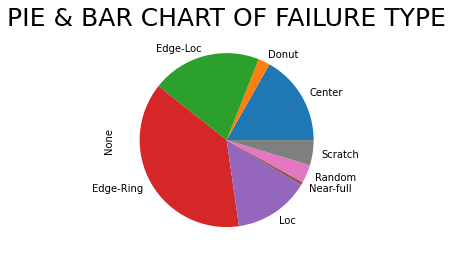

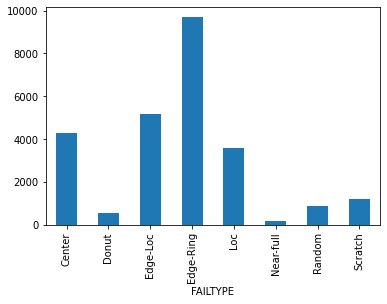

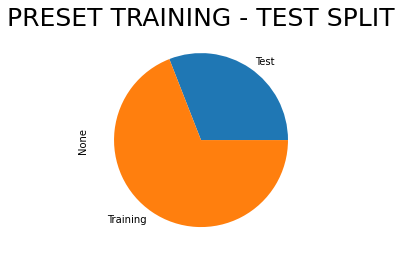

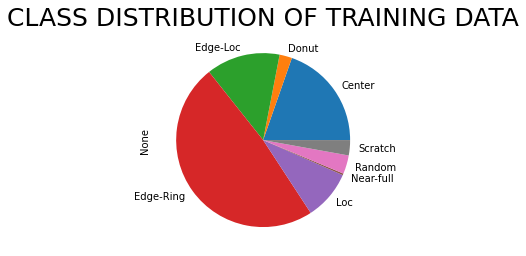

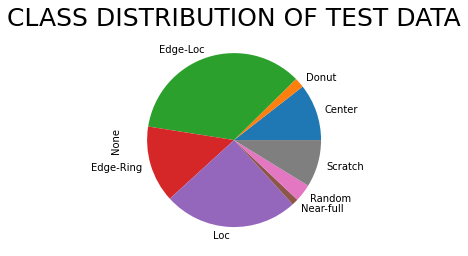

In [15]:
data.groupby("FAILTYPE").size().plot.pie()
plt.title('PIE & BAR CHART OF FAILURE TYPE', fontdict = {'fontsize' : 25})
plt.show()
data.groupby("FAILTYPE").size().plot.bar()
plt.show()
print('\n')
data.groupby("LABEL").size().plot.pie()
plt.title("PRESET TRAINING - TEST SPLIT", fontdict = {'fontsize' : 25})
plt.show()
data.loc[(data["LABEL"] == "Training"),:].groupby("FAILTYPE").size().plot.pie()
plt.title("CLASS DISTRIBUTION OF TRAINING DATA", fontdict = {'fontsize' : 25})
plt.show()
data.loc[(data["LABEL"] == "Test"),:].groupby("FAILTYPE").size().plot.pie()
plt.title("CLASS DISTRIBUTION OF TEST DATA", fontdict = {'fontsize' : 25})
plt.show()
## PRESET data split is meaningless!

In [16]:
data = data.drop('LABEL',axis = 1)

## Visualization

In [17]:
sample = data.sample(25)

In [18]:
WAFER = sample.waferMap.values
LB = sample.FAILTYPE.values

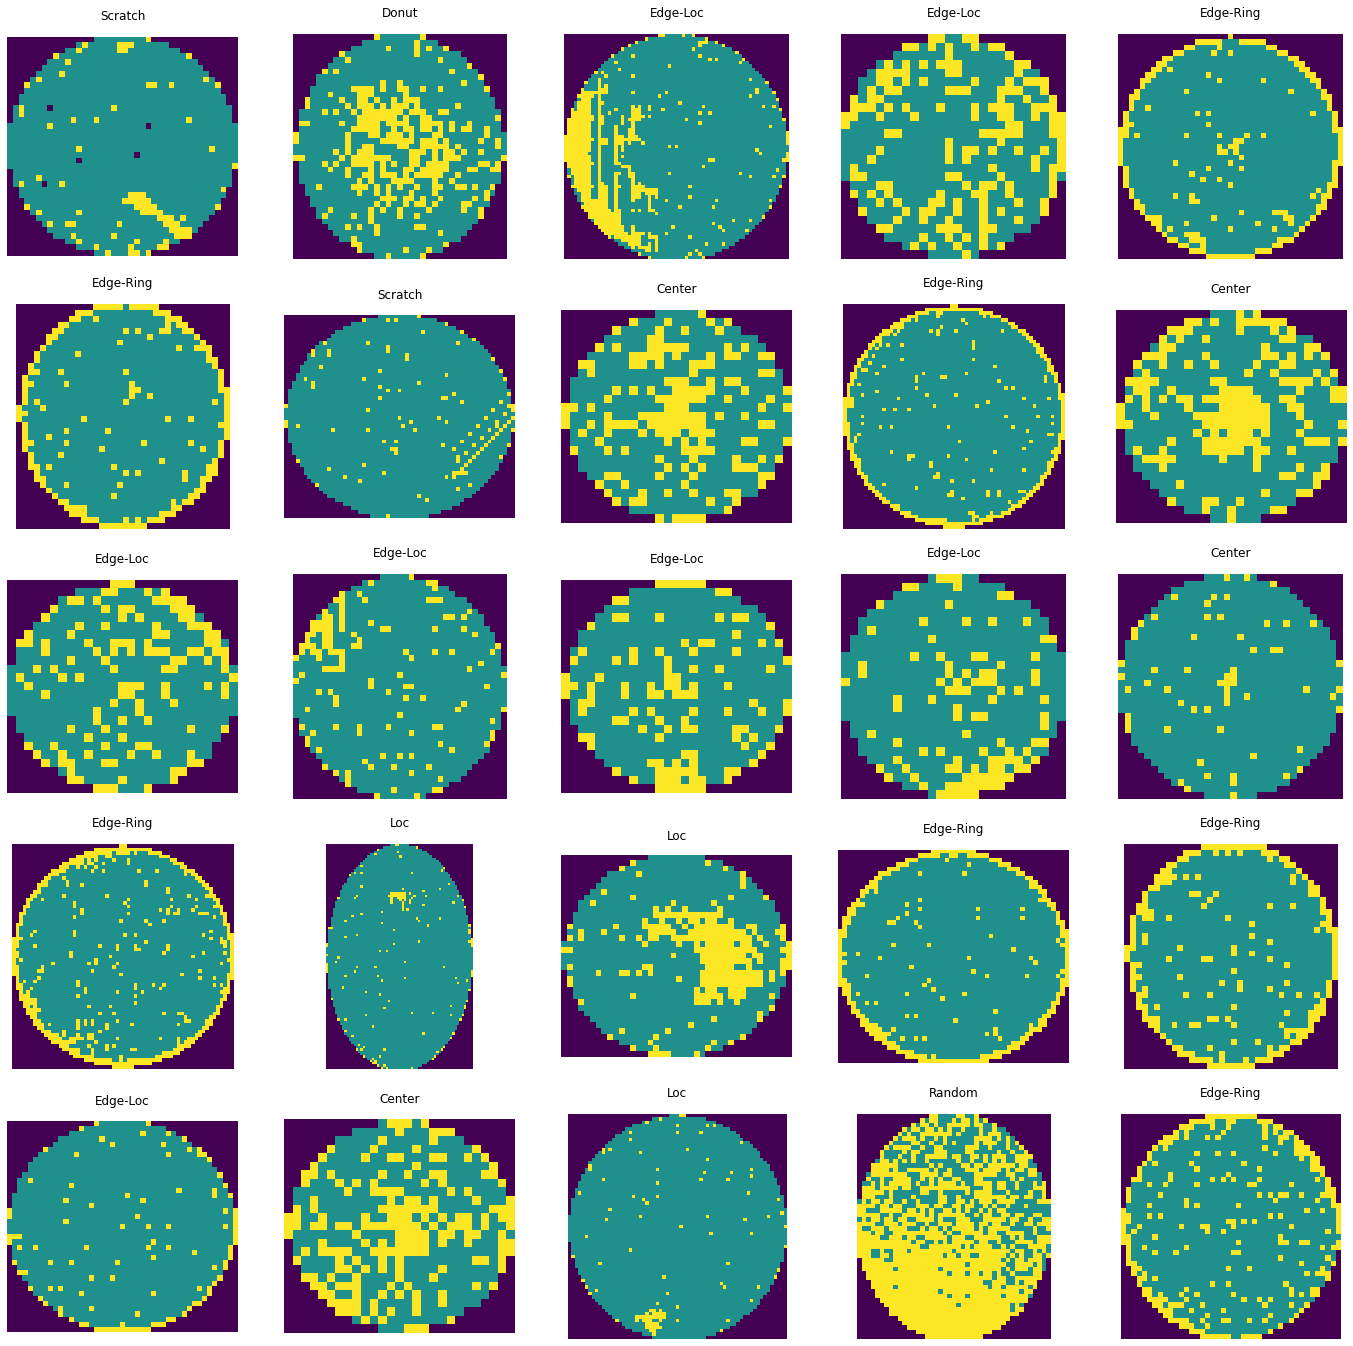

In [19]:
rows = 5
cols = 5
n = rows*cols
fig, axes = plt.subplots(rows, cols, figsize=(24, 24))
for i, wf in enumerate(WAFER):
  r = i // cols
  c = i % cols
  ax = axes[r][c]
  ax.matshow(wf)
  ax.axis('off')
  ax.set_title(LB[i])
# Not every data is square wafer

## FATAL CLASS IMBALANCE

### DATA GENERATING WITH AE

### DATA GERATING WITH GAN